In [1]:
import xgboost as xgb

In [2]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier()

In [3]:
xgb.__version__

'1.7.3'

In [4]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,
                  columns=data.feature_names)
df['target'] = data.target
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data.data,
                                                 data.target,
                                                 test_size=0.2,
                                                 random_state=156)
x_tr,x_val,y_tr,y_val = train_test_split(x_train,
                                         y_train,
                                         test_size=0.1,
                                         random_state=156)

In [11]:
dtr = xgb.DMatrix(x_tr,y_tr)
dval = xgb.DMatrix(x_val,y_val)
dtest = xgb.DMatrix(x_test,y_test)

In [14]:
param = {
    'max_depth' : 3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params=param,
                      dtrain=dtr,
                      num_boost_round=num_rounds,
                      early_stopping_rounds=50,
                      evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [15]:
pred = xgb_model.predict(dtest)

In [17]:
pred_r = [ 1 if x > 0.5 else 0 for x in pred]

In [20]:
pred_r[:4], pred[:4]

([1, 0, 1, 0],
 array([0.8447872 , 0.00842587, 0.6796298 , 0.08113331], dtype=float32))

In [21]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},f1:{f1:.4f},AUC:{roc_auc:.4f}')

In [22]:
get_clf_eval(y_test,pred_r,pred)

오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561,정밀도:0.9615,재현율:0.9740,f1:0.9677,AUC:0.9937


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

dt_clf.fit(x_train,y_train)
rf_clf.fit(x_train,y_train)

dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)

dt_pred_proba = dt_clf.predict_proba(x_test)[:,1]
rf_pred_proba = rf_clf.predict_proba(x_test)[:,1]

In [28]:
get_clf_eval(y_test,dt_pred,dt_pred_proba)
get_clf_eval(y_test,rf_pred,rf_pred_proba)
# 오차행렬
# [[34  3]
#  [ 2 75]]
# 정확도:0.9561,정밀도:0.9615,재현율:0.9740,f1:0.9677,AUC:0.9937

오차행렬
[[33  4]
 [ 1 76]]
정확도:0.9561,정밀도:0.9500,재현율:0.9870,f1:0.9682,AUC:0.9395
오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561,정밀도:0.9615,재현율:0.9740,f1:0.9677,AUC:0.9918


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

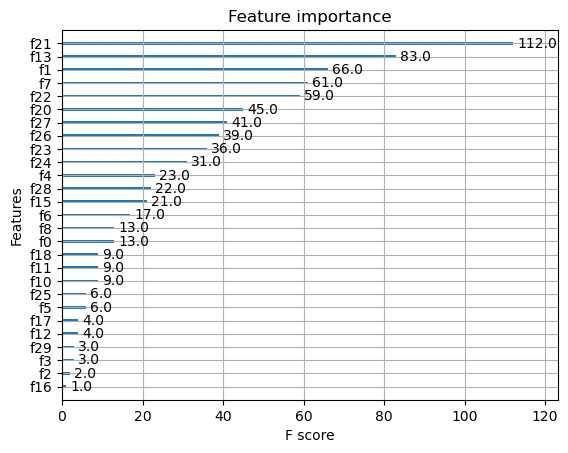

In [30]:
plot_importance(xgb_model)

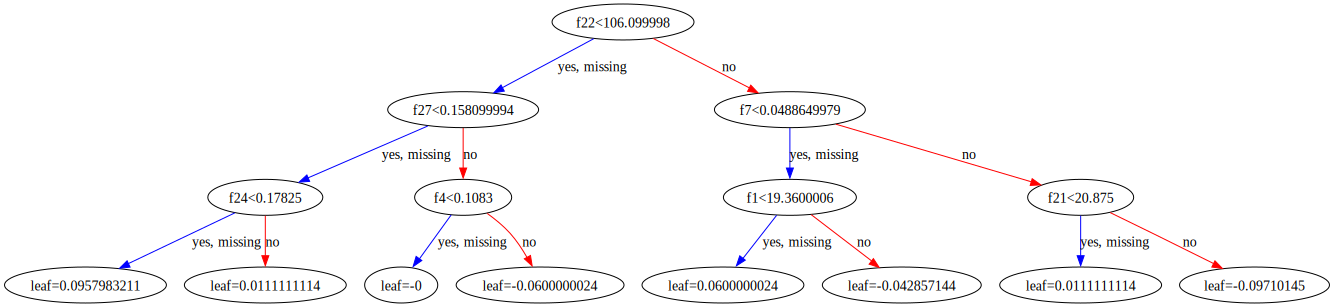

In [31]:
xgb.to_graphviz(xgb_model)

In [33]:
xgb_w = XGBClassifier(n_estimators=400,
              learning_rate=0.05,
              max_depth=3,
              eval_metric='logloss')
xgb_w.fit(x_train,y_train,verbose=True)
w_pred = xgb_w.predict(x_test)
w_pred_proba = xgb_w.predict_proba(x_test)[:,1]

In [ ]:
get_clf_eval(y_test,w_pred,w_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870,f1:0.9744,AUC:0.9954


In [35]:
xgb_w = XGBClassifier(n_estimators=400,
              learning_rate=0.05,
              max_depth=3)
eval_list = [(x_tr,y_tr),(x_val,y_val)]
xgb_w.fit(x_tr,
          y_tr, 
          early_stopping_rounds=50,
          eval_metric='logloss',
          eval_set=eval_list, 
          verbose=True)

w_pred = xgb_w.predict(x_test)
w_pred_proba = xgb_w.predict_proba(x_test)[:,1]
get_clf_eval(y_test,w_pred,w_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[147]	validation_0-logloss:0.01589	validation_1-logloss:0.26137
[148]	validation_0-logloss:0.01572	validation_1-logloss:0.25999
[149]	validation_0-logloss:0.01556	validation_1-logloss:0.26028
[150]	validation_0-logloss:0.01546	validation_1-logloss:0.26048
[151]	validation_0-logloss:0.01531	validation_1-logloss:0.26142
[152]	validation_0-logloss:0.01515	validation_1-logloss:0.26188
[153]	validation_0-logloss:0.01501	validation_1-logloss:0.26227
[154]	validation_0-logloss:0.01486	validation_1-logloss:0.26287
[155]	validation_0-logloss:0.01476	validation_1-logloss:0.26299
[156]	validation_0-logloss:0.01462	validation_1-logloss:0.26346
[157]	validation_0-logloss:0.01448	validation_1-logloss:0.26379
[158]	validation_0-logloss:0.01434	validation_1-logloss:0.26306
[159]	validation_0-logloss:0.01424	validation_1-logloss:0.26237
[160]	validation_0-logloss:0.01410	validation_1-logloss:0.26251
[161]	validation_0-logloss:0.01401	validation_1-logloss:0.26265
[162]	validation_0-logloss:0.01392	valid

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

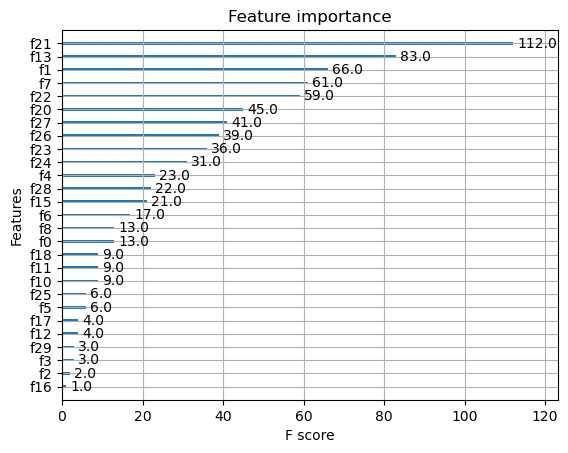

In [36]:
plot_importance(xgb_w)

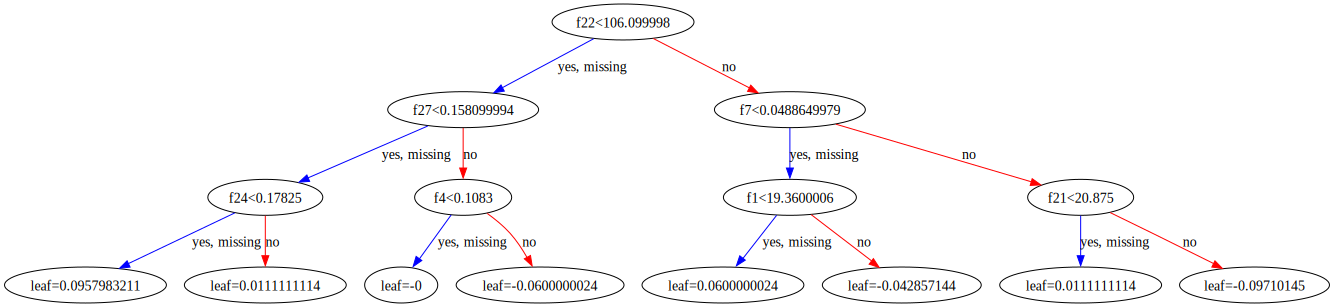

In [37]:
xgb.to_graphviz(xgb_w)

In [38]:
from lightgbm import LGBMClassifier

In [40]:
lgbm = LGBMClassifier(n_estimators=400)
# evals = [(x_test,y_test)]
lgbm.fit(x_tr,
         y_tr,
         early_stopping_rounds=50,
         eval_metric='logloss',
         eval_set=eval_list,
         verbose=True)

[1]	training's binary_logloss: 0.586411	valid_1's binary_logloss: 0.599048
[2]	training's binary_logloss: 0.52049	valid_1's binary_logloss: 0.552178
[3]	training's binary_logloss: 0.466482	valid_1's binary_logloss: 0.515308
[4]	training's binary_logloss: 0.421292	valid_1's binary_logloss: 0.485699
[5]	training's binary_logloss: 0.382987	valid_1's binary_logloss: 0.459346
[6]	training's binary_logloss: 0.345477	valid_1's binary_logloss: 0.42701
[7]	training's binary_logloss: 0.316165	valid_1's binary_logloss: 0.406918
[8]	training's binary_logloss: 0.288947	valid_1's binary_logloss: 0.388572
[9]	training's binary_logloss: 0.265013	valid_1's binary_logloss: 0.370753
[10]	training's binary_logloss: 0.244462	valid_1's binary_logloss: 0.355977
[11]	training's binary_logloss: 0.225357	valid_1's binary_logloss: 0.344879
[12]	training's binary_logloss: 0.207146	valid_1's binary_logloss: 0.333028
[13]	training's binary_logloss: 0.191119	valid_1's binary_logloss: 0.322776
[14]	training's binary_

C:\Users\admin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(n_estimators=400)

In [41]:
lgbm_pred = lgbm.predict(x_test)
lgbm_pred_proba = lgbm.predict_proba(x_test)[:,1]
get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)
# 오차행렬
# [[34  3]
#  [ 2 75]]
# 정확도:0.9561,정밀도:0.9615,재현율:0.9740,f1:0.9677,AUC:0.9933

오차행렬
[[34  3]
 [ 3 74]]
정확도:0.9474,정밀도:0.9610,재현율:0.9610,f1:0.9610,AUC:0.9888
